In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Combine into one DataFrame for easier processing
df = pd.concat([X, y], axis=1) 
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [15]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [17]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0.0,False,False,False,False,True,False,True,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2.0,False,False,True,False,True,True,False,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1.0,False,False,True,False,True,True,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0.0,False,True,False,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0.0,True,False,False,False,True,False,False,False,False


In [19]:
from sklearn.preprocessing import StandardScaler

# columns need scalling
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

df_scaled = df_encoded.copy()

scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])


In [20]:
df_scaled.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.948726,1.0,0.757525,-0.264900,1.0,0.017197,0.0,1.087338,-0.711131,0.0,False,False,False,False,True,False,True,True,False
1,1.392002,1.0,1.611220,0.760415,0.0,-1.821905,1.0,0.397182,2.504881,2.0,False,False,True,False,True,True,False,False,False
2,1.392002,1.0,-0.665300,-0.342283,0.0,-0.902354,1.0,1.346147,1.432877,1.0,False,False,True,False,True,True,False,False,True
3,-1.932564,1.0,-0.096170,0.063974,0.0,1.637359,0.0,2.122573,-0.711131,0.0,False,True,False,False,False,False,True,False,False
4,-1.489288,0.0,-0.096170,-0.825922,0.0,0.980537,0.0,0.310912,-0.711131,0.0,True,False,False,False,True,False,False,False,False


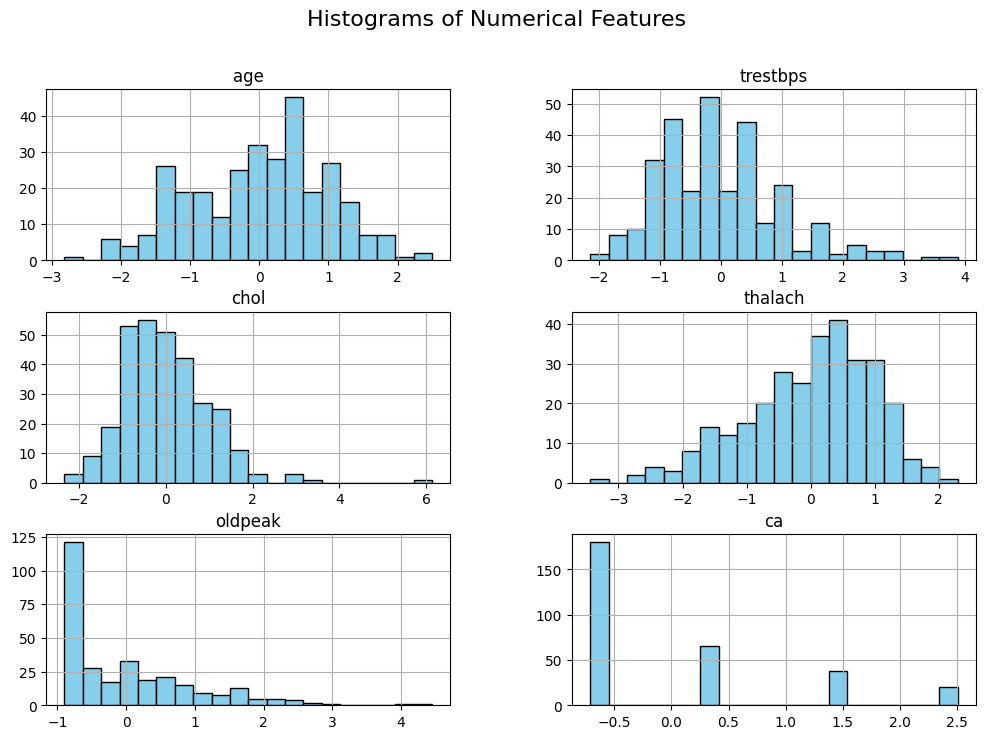

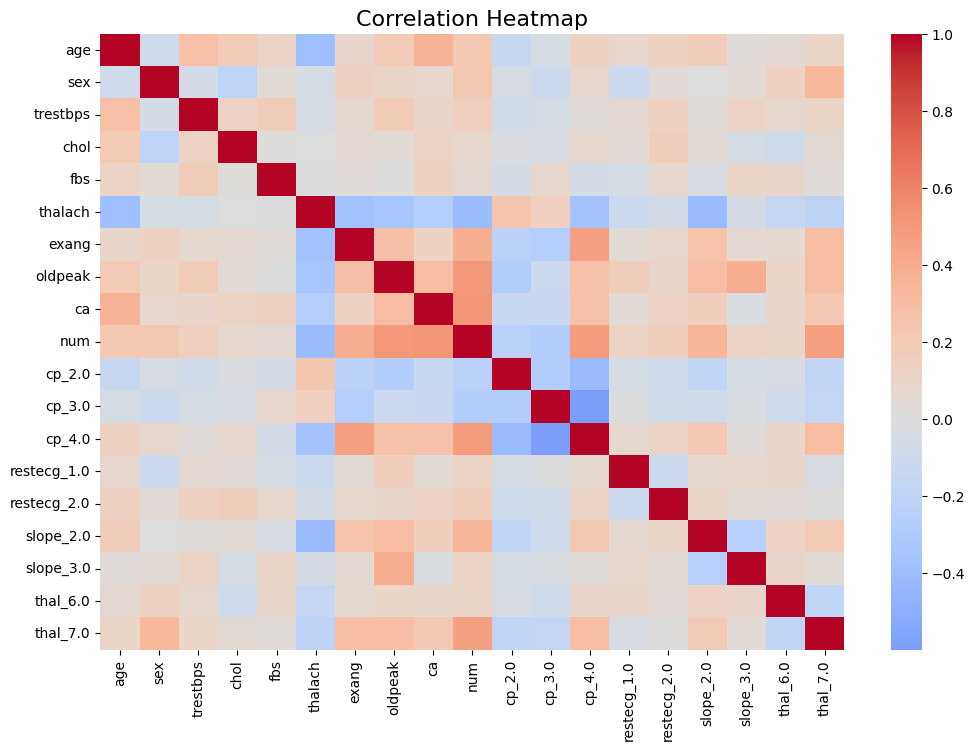

<Figure size 1500x800 with 0 Axes>

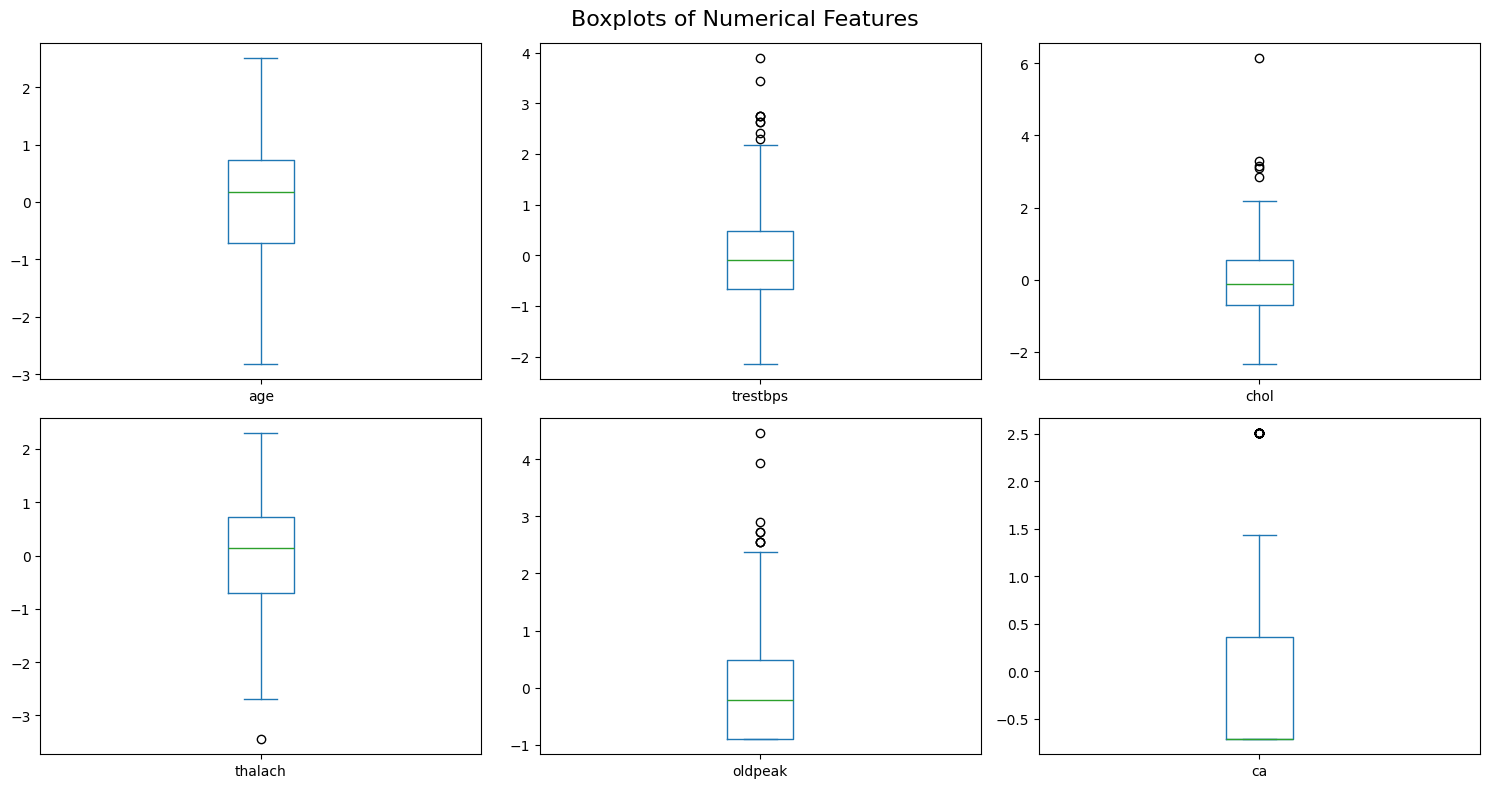

In [21]:
# 1️⃣ Histograms for numerical features
df_scaled[num_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# 2️⃣ Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# 3️⃣ Boxplots for numerical features
plt.figure(figsize=(15, 8))
df_scaled[num_cols].plot(kind="box", subplots=True, layout=(2,3), figsize=(15,8), sharey=False)
plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()